## Predict the Dog & Cat Breed using Images

In [10]:
from tensorflow.python.client import device_lib

print('Show System RAM Memory:\n\n')
!cat /proc/meminfo | egrep "MemTotal*"

print('\n\nShow Devices:\n\n'+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13335268 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 106609665384094114
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2098554523255234622
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4028285006573847118
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11547970403298793832
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [4]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras import applications
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow
from google.colab import files
import zipfile
import seaborn as sns
import tarfile
import io
import requests


Using TensorFlow backend.


In [0]:
## Downlaod the data 

# Url
image_url = "http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz"
  
# URL of the images to be downloaded  
r = requests.get(image_url) 

with open("images.tar.gz",'wb') as f: 
  
    # Saving received content as a gz file in 
    # binary format 
  
    # write the contents of the response (r.content) 
    # to a new file in binary mode. 
    f.write(r.content)
    

In [0]:
## Extract the Data

data = tarfile.open("images.tar.gz", 'r')
data.extractall()

In [0]:
# Store all images

with open('list.txt', "r") as f:
    check = f.readlines()

images_list = []
cluster_ids = []
for line in check:
    if line[0] == "#":
        pass
    else:
        line = line.strip()
        line = line.split()
        image_name = line[0] + ".jpg"
        cluster_id = line[1]
        images_list.append(image.load_img(r"images/"+image_name, target_size=(224, 224))) 
        cluster_ids.append(cluster_id)
        
X = np.array([image.img_to_array(img) for img in images_list])

### **Classify using VGG16 weights trained on ImageNet**

In [7]:
## Get the VGG16 models weights
model = applications.VGG16(include_top=False, weights='imagenet')

## Preprocess on our dataset
X_pre = preprocess_input(X)

## Get features
features = model.predict(X_pre)
features_ = features.reshape(7349, -1)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
## Save the the featues
np.save('features',features_)

In [0]:
## Load the features
features_ = np.load('features.npy')

#### Train data using Logistic Regression

In [34]:
## Index of Images
index = np.arange(features_.shape[0])

## Split train and test 
X_train, X_test, y_train, y_test,X_index,y_index = train_test_split(features_, cluster_ids,index, stratify=cluster_ids)

## Train the model
lr = LogisticRegression().fit(X_train, y_train)

## Predict
predict=lr.predict(X_test)

## Print the Accuracy
print('Predicted Accuracy on Test is {}'.format(accuracy_score(y_test,predict,normalize=True)*100))

Predicted Accuracy on Test is 87.21436343852012


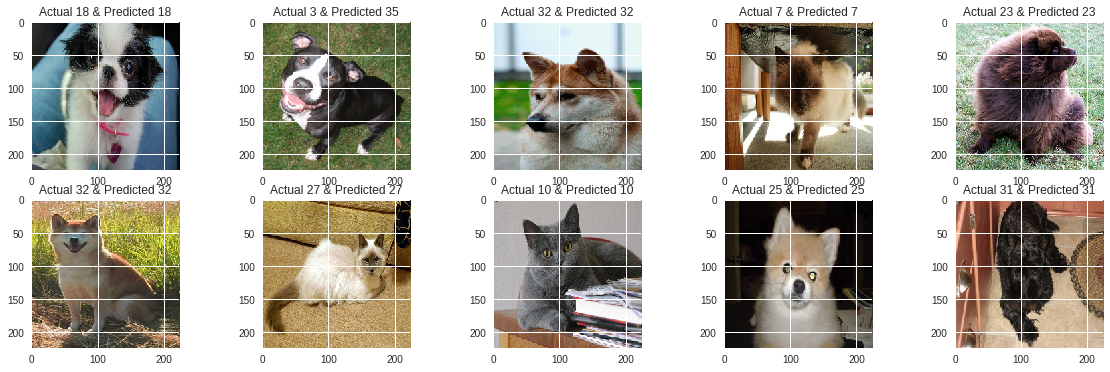

In [40]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y_test[0],predict[0]))  ## Label 
axes[0,0].imshow(images_list[y_index[0]]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y_test[1],predict[1]))
axes[0,1].imshow(images_list[y_index[1]])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y_test[2],predict[2]))
axes[0,2].imshow(images_list[y_index[2]])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y_test[3],predict[3]))
axes[0,3].imshow(images_list[y_index[3]])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y_test[4],predict[4]))
axes[0,4].imshow(images_list[y_index[4]])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y_test[5],predict[5]))
axes[1,0].imshow(images_list[y_index[5]])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y_test[6],predict[6]))
axes[1,1].imshow(images_list[y_index[6]])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y_test[7],predict[7]))
axes[1,2].imshow(images_list[y_index[7]])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y_test[8],predict[8]))
axes[1,3].imshow(images_list[y_index[8]])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y_test[9],predict[9]))
axes[1,4].imshow(images_list[y_index[9]])
plt.show()

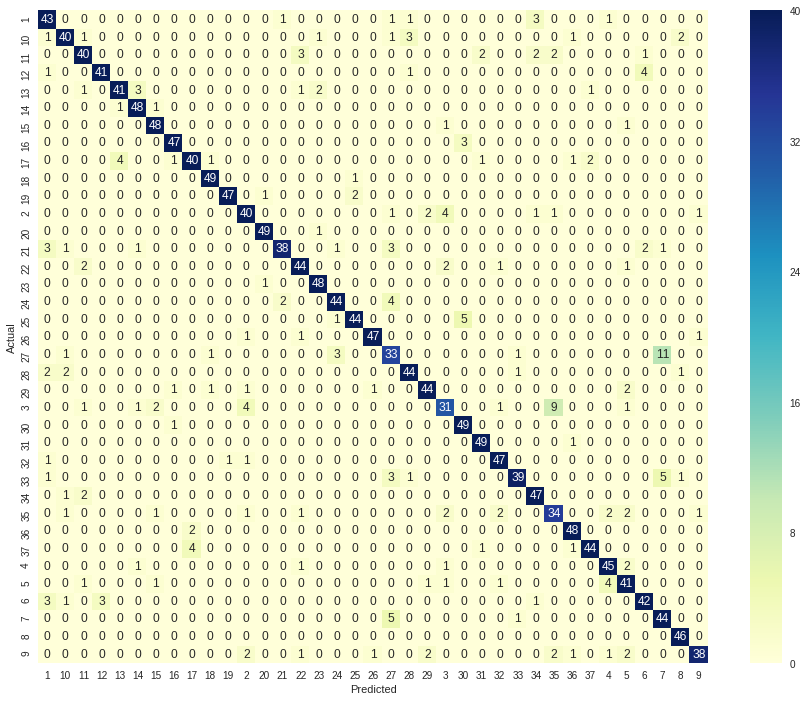

In [66]:
## Visualize the confusion matrix
y=pd.Series(y_test).sort_values(ascending=True)
y_hat = pd.Series(list(predict)).sort_values(ascending=True)
plt.figure(figsize = (15,12))
sns.heatmap(pd.crosstab(y,y_hat,rownames=['Actual'],colnames=['Predicted']), annot=True,  fmt="d",cmap="YlGnBu",robust =True)
plt.show()

#### Train data using SGDClassifier

In [75]:
## Train the model
sgd = SGDClassifier().fit(X_train, y_train)

## Predict
predict=sgd.predict(X_test)

## Print the Accuracy
print('Predicted Accuracy on Test is {}'.format(accuracy_score(y_test,predict,normalize=True)*100))

Predicted Accuracy on Test is 82.58977149075082


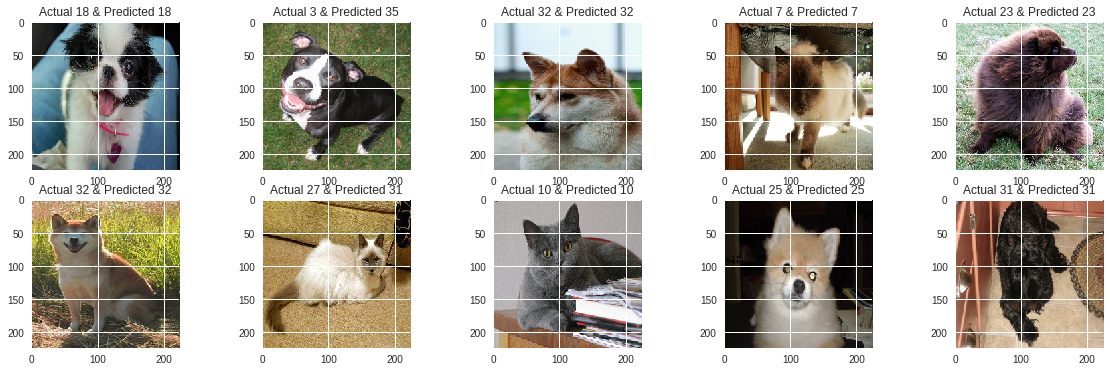

In [76]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y_test[0],predict[0]))  ## Label 
axes[0,0].imshow(images_list[y_index[0]]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y_test[1],predict[1]))
axes[0,1].imshow(images_list[y_index[1]])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y_test[2],predict[2]))
axes[0,2].imshow(images_list[y_index[2]])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y_test[3],predict[3]))
axes[0,3].imshow(images_list[y_index[3]])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y_test[4],predict[4]))
axes[0,4].imshow(images_list[y_index[4]])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y_test[5],predict[5]))
axes[1,0].imshow(images_list[y_index[5]])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y_test[6],predict[6]))
axes[1,1].imshow(images_list[y_index[6]])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y_test[7],predict[7]))
axes[1,2].imshow(images_list[y_index[7]])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y_test[8],predict[8]))
axes[1,3].imshow(images_list[y_index[8]])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y_test[9],predict[9]))
axes[1,4].imshow(images_list[y_index[9]])
plt.show()

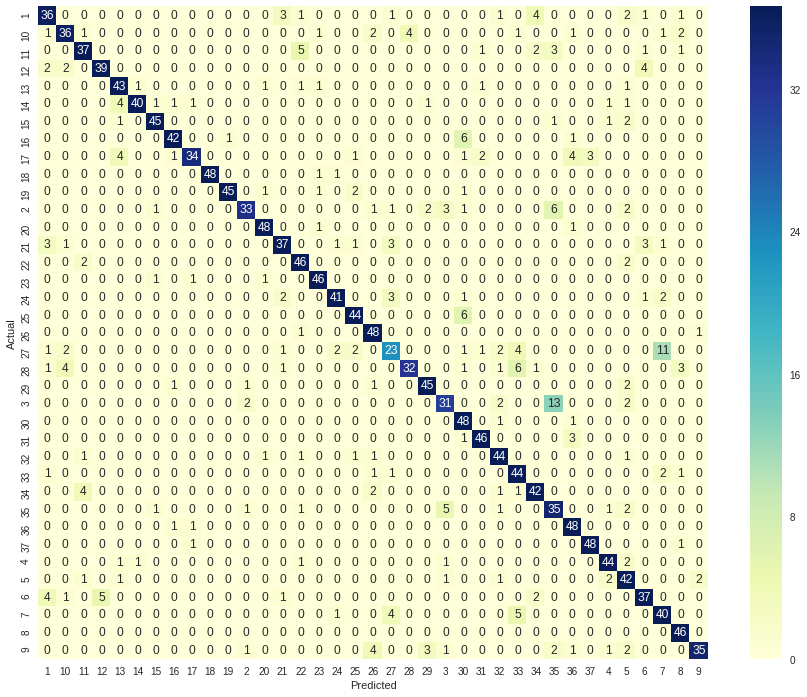

In [77]:
## Visualize the confusion matrix
y=pd.Series(y_test).sort_values(ascending=True)
y_hat = pd.Series(list(predict)).sort_values(ascending=True)
plt.figure(figsize = (15,12))
sns.heatmap(pd.crosstab(y,y_hat,rownames=['Actual'],colnames=['Predicted']), annot=True,  fmt="d",cmap="YlGnBu",robust =True)
plt.show()